In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

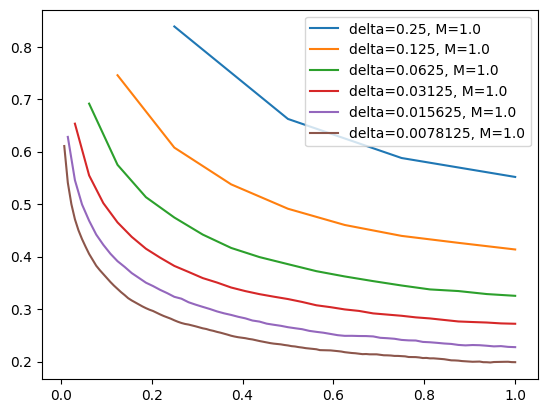

In [3]:
Ns = jnp.array([4, 8, 16, 32, 64, 128])
deltas = jnp.array([0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125])
fineDeltas = Ns ** 1
Mdeltas = jnp.ones((len(deltas),)) * Ns ** 0
Ndeltas = Ns
solver = "ssm_parabola"
prefix = "langevin" + solver
folder = "./"
for n in range(len(Ndeltas)):
    N = Ndeltas[n]
    delta = deltas[n]
    M = Mdeltas[n]
    fine = fineDeltas[n]
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{M}.npy')
    paths_2 = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fine}.npy')
    N = int(N)
    N += 1
    assert N == len(paths_1[0]) == len(paths_2[0])
    ts = jnp.linspace(0, 1, N)
    ranged = range(N)
    plt.plot(ts, jnp.log(jnp.mean(jnp.linalg.norm(paths_1 - paths_2, axis=-1), axis=0)) / jnp.log(delta),
         label=f'delta={delta}, M={M}')
plt.legend()

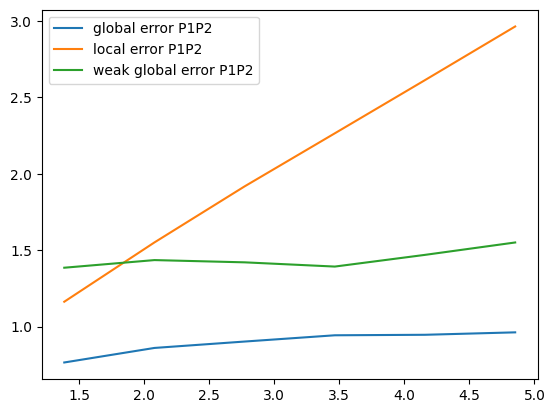

In [4]:
x0 = jnp.ones((2,))
STRONG_GLOBAL_ERRORS_P1P2 = []
STRONG_GLOBAL_ERRORS_P1X = []
STRONG_LOCAL_ERRORS_P1P2 = []
STRONG_LOCAL_ERRORS_P1X = []
WEAK_GLOBAL_ERRORS_P1P2 = []
WEAK_POLYNOMIAL = lambda x: x.T@x
COV_HYPOELLIPTIC_COMPONENT_ERRORS = []
for n in range(len(deltas)):
    N = Ndeltas[n]
    M = Mdeltas[n]
    fine = fineDeltas[n]
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{M}.npy')
    paths_2 = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fine}.npy')
    #paths = jnp.load(f'{folder}/{prefix}_paths_{N}_{fine}.npy')
    N = int(N)
    #dt = 1 / paths.shape[1]
    #k = int(paths.shape[1] / N)
    #non_normalized_incs = paths * jnp.sqrt(dt)
    linspace = jnp.linspace(0, 1, N + 1)
    #B = jnp.cumsum(non_normalized_incs, axis=1)
    #B = jnp.insert(B, 0, 0.0, axis=1)
    #V = x0[1] + B
    #intB = jnp.cumsum(B, axis=1) * dt
    #V = V[:, ::k, ...]
    #intB = intB[:, ::k, ...]
    #U = x0[0] + x0[1] * linspace[1:].reshape((linspace.shape[0] - 1)) + jnp.squeeze(intB[:, :-1], axis=-1)
    #U = jnp.insert(U, 0, x0[0], axis=1)
    #U = U.reshape((U.shape[0], U.shape[1],))
    #V = V.reshape((V.shape[0], V.shape[1],))
    #X = jnp.stack([U, V], axis=-1)
    STRONG_GLOBAL_ERROR_P1P2 = jnp.max(jnp.mean(jnp.linalg.norm(paths_2 - paths_1, axis=-1), axis=0), axis=-1)
    #STRONG_GLOBAL_ERROR_P1X = jnp.max(jnp.mean(jnp.linalg.norm(paths_1 - X, axis=-1), axis=0), axis=-1)
    STRONG_LOCAL_ERROR_P1P2 = jnp.mean(jnp.linalg.norm(paths_2[:, 1] - paths_1[:, 1], axis=-1), axis=0)
    #STRONG_LOCAL_ERROR_P1X = jnp.mean(jnp.linalg.norm(paths_1[:, 1] - X[:, 1], axis=-1), axis=0)
    MOMENT_P1 = jnp.array([WEAK_POLYNOMIAL(paths_1[i, -1, jnp.newaxis,:]) for i in range(paths_1.shape[0])])
    MOMENT_P2 = jnp.array([WEAK_POLYNOMIAL(paths_2[i, -1, jnp.newaxis,:]) for i in range(paths_2.shape[0])])
    WEAK_GLOBAL_ERROR_P1P2 = jnp.linalg.norm(jnp.linalg.norm(jnp.mean(MOMENT_P2, axis=0)-jnp.mean(MOMENT_P1, axis=0),axis=-1),axis=-1)
    #ONLY FOR IBM
    #COV_HYPOELLIPTIC_COMPONENT_ERROR = jnp.max(jnp.abs(jnp.diag(jnp.cov(paths_1[:,:,0], rowvar=False))-jnp.linspace(0, 1, N+1)**3/3), axis=-1)
    COV_HYPOELLIPTIC_COMPONENT_ERROR = jnp.max(jnp.abs(jnp.diag(jnp.cov(paths_1[:,:,0], rowvar=False))-jnp.diag(jnp.cov(paths_2[:,:,0], rowvar=False))), axis=-1)
    STRONG_GLOBAL_ERRORS_P1P2.append(STRONG_GLOBAL_ERROR_P1P2)
    #STRONG_GLOBAL_ERRORS_P1X.append(STRONG_GLOBAL_ERROR_P1X)
    STRONG_LOCAL_ERRORS_P1P2.append(STRONG_LOCAL_ERROR_P1P2)
    #STRONG_LOCAL_ERRORS_P1X.append(STRONG_LOCAL_ERROR_P1X)
    WEAK_GLOBAL_ERRORS_P1P2.append(WEAK_GLOBAL_ERROR_P1P2)
    COV_HYPOELLIPTIC_COMPONENT_ERRORS.append(COV_HYPOELLIPTIC_COMPONENT_ERROR)
STRONG_GLOBAL_ERRORS_P1P2 = jnp.array(STRONG_GLOBAL_ERRORS_P1P2)
#STRONG_GLOBAL_ERRORS_P1X = jnp.array(STRONG_GLOBAL_ERRORS_P1X)
STRONG_LOCAL_ERRORS_P1P2 = jnp.array(STRONG_LOCAL_ERRORS_P1P2)
#STRONG_LOCAL_ERRORS_P1X = jnp.array(STRONG_LOCAL_ERRORS_P1X)
WEAK_GLOBAL_ERRORS_P1P2 = jnp.array(WEAK_GLOBAL_ERRORS_P1P2)
COV_HYPOELLIPTIC_COMPONENT_ERRORS = jnp.array(COV_HYPOELLIPTIC_COMPONENT_ERRORS)
plt.plot(-jnp.log(deltas), -jnp.log(STRONG_GLOBAL_ERRORS_P1P2), label='global error P1P2')
#plt.plot(-jnp.log(deltas), -jnp.log(STRONG_GLOBAL_ERRORS_P1X), label='global error P1X')
plt.plot(-jnp.log(deltas), -jnp.log(STRONG_LOCAL_ERRORS_P1P2), label='local error P1P2')
#plt.plot(-jnp.log(deltas), -jnp.log(STRONG_LOCAL_ERRORS_P1X), label='local error P1X')
plt.plot(-jnp.log(deltas), -jnp.log(WEAK_GLOBAL_ERRORS_P1P2), label='weak global error P1P2')
#plt.plot(-jnp.log(deltas), -jnp.log(COV_HYPOELLIPTIC_COMPONENT_ERRORS), label='cov hypoelliptic component error')
plt.legend()

In [ ]:
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_GLOBAL_ERRORS_P1P2))
print(linear_regressor.coef_)
print(linear_regressor.score(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_GLOBAL_ERRORS_P1P2)))
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_LOCAL_ERRORS_P1P2))
print(linear_regressor.coef_)
print(linear_regressor.score(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_LOCAL_ERRORS_P1P2)))
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_GLOBAL_ERRORS_P1X))
print(linear_regressor.coef_)
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_LOCAL_ERRORS_P1X))
print(linear_regressor.coef_)


In [186]:
MOMENT_P1 = jnp.array([[WEAK_POLYNOMIAL(paths_1[i, j, jnp.newaxis,:]) for j in range(paths_1.shape[1])] for i in range(paths_1.shape[0])])
MOMENT_P2 = jnp.array([[WEAK_POLYNOMIAL(paths_2[i, j, jnp.newaxis,:]) for j in range(paths_2.shape[1])] for i in range(paths_2.shape[0])])

KeyboardInterrupt: 

In [91]:
prefix = "langevin_ekf0"
jnp.save(f'{prefix}_STRONG_GLOBAL_ERRORS', jnp.array([deltas, STRONG_GLOBAL_ERRORS_P1P2]))
jnp.save(f'{prefix}_STRONG_LOCAL_ERRORS', jnp.array([deltas, STRONG_LOCAL_ERRORS_P1P2]))
jnp.save(f'{prefix}_WEAK_GLOBAL_ERRORS', jnp.array([deltas, WEAK_GLOBAL_ERRORS_P1P2]))
jnp.save(f'{prefix}_COV_HYPOELLIPTIC_COMPONENT_ERRORS', jnp.array([deltas, COV_HYPOELLIPTIC_COMPONENT_ERRORS]))

Array([[0.25      , 0.125     , 0.0625    , 0.03125   , 0.015625  ,
        0.0078125 ],
       [0.15720664, 0.05591394, 0.01995925, 0.00717814, 0.00255752,
        0.0009045 ]], dtype=float32)

In [52]:
STRONG_LOCAL_ERRORS

Array([[0.25      , 0.125     , 0.0625    , 0.03125   , 0.015625  ,
        0.0078125 ],
       [0.15720664, 0.05591394, 0.01995925, 0.00717814, 0.00255752,
        0.0009045 ]], dtype=float32)

In [92]:
prefix = "langevin_ekf0"
STRONG_GLOBAL_ERRORS = jnp.load(f'{prefix}_STRONG_GLOBAL_ERRORS.npy')
STRONG_LOCAL_ERRORS = jnp.load(f'{prefix}_STRONG_LOCAL_ERRORS.npy')
WEAK_GLOBAL_ERRORS = jnp.load(f'{prefix}_WEAK_GLOBAL_ERRORS.npy')
COV_HYPOELLIPTIC_COMPONENT_ERRORS = jnp.load(f'{prefix}_COV_HYPOELLIPTIC_COMPONENT_ERRORS.npy')
np.savetxt(f'{prefix}_STRONG_GLOBAL_ERRORS.csv', STRONG_GLOBAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
np.savetxt(f'{prefix}_STRONG_LOCAL_ERRORS.csv', STRONG_LOCAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
np.savetxt(f'{prefix}_WEAK_GLOBAL_ERRORS.csv', WEAK_GLOBAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
np.savetxt(f'{prefix}_COV_HYPOELLIPTIC_COMPONENT_ERRORS.csv', COV_HYPOELLIPTIC_COMPONENT_ERRORS.T, delimiter=',', header='deltas,errors', comments="")

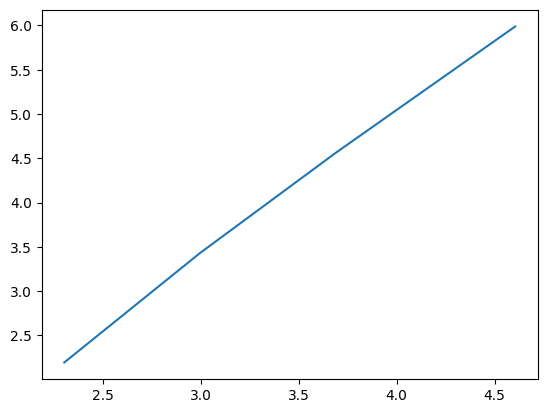

In [13]:
deltas = [0.1, 0.05, 0.025, 0.01]
LOCAL_ERRORS = []
for delta in deltas:
    experiment_local = jnp.load(f'./experiment_{delta}.npy')
    LOCAL_ERRORS.append(jnp.mean(jnp.linalg.norm(experiment_local[0]-experiment_local[1], axis=-1), axis=0))
LOCAL_ERRORS = jnp.array(LOCAL_ERRORS)
deltas = jnp.array(deltas)
plt.plot(-jnp.log(deltas), -jnp.log(LOCAL_ERRORS))

In [14]:
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(LOCAL_ERRORS))
print(linear_regressor.coef_)

[1.6431799]


In [12]:
LOCAL_ERRORS

Array([0.05534366, 0.01586504, 0.00515722, 0.00124821], dtype=float32)

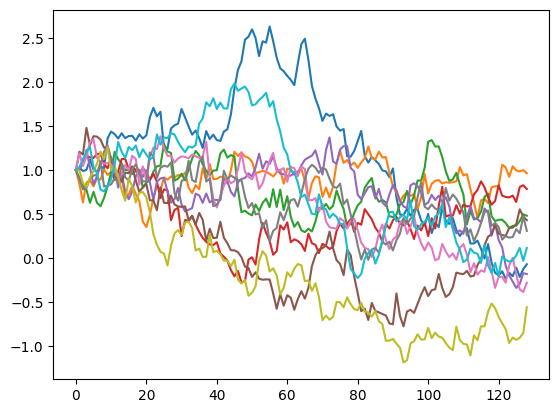

In [77]:
for k in range(10):
    plt.plot(paths_2[k,:,1])

In [78]:
paths_1

Array([[[ 1.        ],
        [ 1.0265744 ],
        [ 0.99095416],
        ...,
        [-0.21850426],
        [-0.129388  ],
        [-0.0749265 ]],

       [[ 1.        ],
        [ 0.8423462 ],
        [ 0.6321257 ],
        ...,
        [ 0.9778836 ],
        [ 0.9934125 ],
        [ 0.9583787 ]],

       [[ 1.        ],
        [ 0.91213626],
        [ 0.8211319 ],
        ...,
        [ 0.41603643],
        [ 0.4908803 ],
        [ 0.47557977]],

       ...,

       [[ 1.        ],
        [ 0.948772  ],
        [ 1.2195647 ],
        ...,
        [ 0.30161718],
        [ 0.29484665],
        [ 0.47969165]],

       [[ 1.        ],
        [ 1.0662419 ],
        [ 1.2363421 ],
        ...,
        [ 0.3977299 ],
        [ 0.39191234],
        [ 0.42984346]],

       [[ 1.        ],
        [ 0.87056106],
        [ 1.182246  ],
        ...,
        [ 0.9486883 ],
        [ 1.0920687 ],
        [ 1.2547325 ]]], dtype=float32)

In [79]:
jnp.mean(paths_1[:, -1])

Array(0.36863974, dtype=float32)

In [80]:
1/jnp.exp(2)

Array(0.13533528, dtype=float32, weak_type=True)

In [87]:
jnp.log((jnp.mean(paths_1[:, -1])-jnp.exp(-1)))/jnp.log(delta)

Array(1.4801669, dtype=float32)

In [85]:
jnp.exp(-1)

Array(0.36787945, dtype=float32, weak_type=True)